In [1]:
import numpy as np
import pandas as pd

In [30]:
np.set_printoptions(precision=5, suppress=True)

In [31]:
df = pd.read_csv('../data/imobiliare_bucuresti.csv')

In [32]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/...
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/...
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/...
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/b...
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/...
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/...
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/...
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/...
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/...


In [33]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']
X = df.iloc[:,1:9]


In [34]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [35]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [36]:
# further process X data maybe
# construct normal eq and determine model coefs (((XtX)^-1)Xt)y (y = x*w => w = y/x)
# validate results (how, when)
# f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

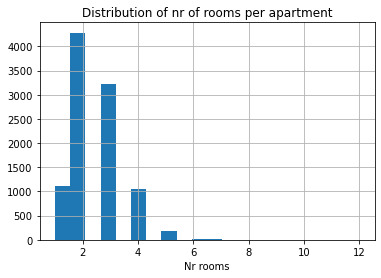

In [38]:
X['nr cam'].hist(bins=20)
plt.xlabel('Nr rooms')
plt.title('Distribution of nr of rooms per apartment')

Text(0.5, 1.0, 'Distribution of apartment surface')

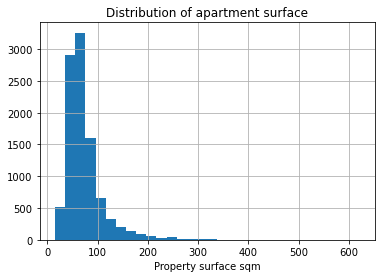

In [39]:
X['mp'].hist(bins=30)
plt.xlabel('Property surface sqm')
plt.title('Distribution of apartment surface')

(array([5637., 2571.,  748.,  335.,  191.,  127.,   71.,   36.,   50.,
          25.,    8.,    6.,   14.,    6.,    3.,   14.,    4.,   17.,
           2.,   10.,    2.,    2.,    2.,    2.,    1.,    3.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    2.,
           0.,    2.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  18000.,   95240.,  172480.,  249720.,  326960.,  404200.,
         481440.,  558680.,  635920.,  713160.,  790400.,  867640.,
         944880., 1022120., 1099360., 1176600., 1253840., 1331080.,
        1408320., 1485560., 1562800., 1640040., 1717280., 1794520.,
        1871760., 1949000., 2026240., 2103480., 2180720., 2257960.,
        2335200., 2412440., 2489680., 2566920., 2644160., 2721400.,
        2798640., 2875880., 2953120., 3030360., 3107600., 3184840.,
        3262080., 3339320., 3416560., 3493800., 3571040., 3648280.,
        3725520., 3802760., 3880000.]),
 <BarContainer o

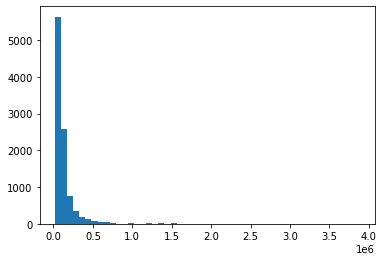

In [40]:
plt.hist(y_price.values, bins=50)

In [41]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [42]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [43]:
df_new = df[new_corr_features]

In [44]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


In [45]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [46]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [47]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [48]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [49]:
np_X = X.values

In [50]:
np_X

array([[ 2.  , 56.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       [ 2.  , 57.  ,  0.  , ...,  2.  ,  0.  ,  1.  ],
       [ 2.  , 67.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       ...,
       [ 2.  , 48.  ,  0.  , ...,  4.  ,  0.  ,  0.  ],
       [ 4.  , 83.81,  0.  , ...,  3.  ,  1.  ,  1.  ],
       [ 1.  , 35.  ,  0.  , ...,  4.  ,  1.  ,  1.  ]])

In [51]:
np_X.mean(axis=0)

array([ 2.50571, 73.70487,  0.12569,  0.36183,  0.51248,  3.33647,
        0.71759,  0.59321])

In [52]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [53]:
np_X_n

array([[-0.53209, -0.44072, -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       [-0.53209, -0.41582, -0.37916, ..., -0.47416, -1.59404,  0.8281 ],
       [-0.53209, -0.1669 , -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       ...,
       [-0.53209, -0.63986, -0.37916, ...,  0.23541, -1.59404, -1.20759],
       [ 1.57224,  0.25154, -0.37916, ..., -0.11937,  0.62734,  0.8281 ],
       [-1.58426, -0.96346, -0.37916, ...,  0.23541,  0.62734,  0.8281 ]])

In [54]:
np_y = y_price.values
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n

array([0.00461, 0.00461, 0.00559, ..., 0.01062, 0.02382, 0.01126])

In [55]:
np_y.min()


18000

In [56]:
np_y.max()

3880000

In [57]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()

In [58]:
np_weights = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)

In [59]:
np_weights

array([-0.00868,  0.04232, -0.00003, -0.00004,  0.00006,  0.00202,
       -0.00217,  0.00101])

In [60]:
np_X_n

array([[-0.53209, -0.44072, -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       [-0.53209, -0.41582, -0.37916, ..., -0.47416, -1.59404,  0.8281 ],
       [-0.53209, -0.1669 , -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       ...,
       [-0.53209, -0.63986, -0.37916, ...,  0.23541, -1.59404, -1.20759],
       [ 1.57224,  0.25154, -0.37916, ..., -0.11937,  0.62734,  0.8281 ],
       [-1.58426, -0.96346, -0.37916, ...,  0.23541,  0.62734,  0.8281 ]])

In [61]:
np_y_preds = np_X_n.dot(np_weights)

In [62]:
np_y_preds

array([-0.01561, -0.00973, -0.00402, ..., -0.01965, -0.00367, -0.02699])

(array([7566., 1816.,  359.,  101.,   32.,   11.,    5.,    4.,    1.,
           2.]),
 array([-0.05244,  0.00608,  0.0646 ,  0.12311,  0.18163,  0.24015,
         0.29867,  0.35719,  0.41571,  0.47422,  0.53274]),
 <BarContainer object of 10 artists>)

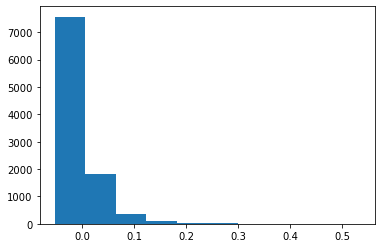

In [63]:
plt.hist(np_y_preds)

In [64]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [65]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

array([[-0.53209, -0.44072, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.41582, -0.37916, ..., -1.59404,  0.8281 ,  1.     ],
       [-0.53209, -0.1669 , -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       ...,
       [-0.53209, -0.63986, -0.37916, ..., -1.59404, -1.20759,  1.     ],
       [ 1.57224,  0.25154, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-1.58426, -0.96346, -0.37916, ...,  0.62734,  0.8281 ,  1.     ]])

In [66]:
np_weights_b = np.linalg.pinv(np_X_nb.T.dot(np_X_nb)).dot(np_X_nb.T).dot(np_y_n)
np_weights_b

array([-0.00868,  0.04232, -0.00003, -0.00004,  0.00006,  0.00202,
       -0.00217,  0.00101,  0.03028])

In [67]:
np_y_preds2 = np_X_nb.dot(np_weights_b)
np_y_preds2

array([0.01466, 0.02054, 0.02625, ..., 0.01063, 0.02661, 0.00329])

(array([  21.,  628., 2177., 3021., 1719.,  772.,  433.,  269.,  199.,
         143.,  107.,   98.,   78.,   41.,   35.,   30.,   13.,   27.,
          15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    2.,
           2.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,
           0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([-0.02217, -0.01046,  0.00124,  0.01295,  0.02465,  0.03635,
         0.04806,  0.05976,  0.07146,  0.08317,  0.09487,  0.10657,
         0.11828,  0.12998,  0.14169,  0.15339,  0.16509,  0.1768 ,
         0.1885 ,  0.2002 ,  0.21191,  0.22361,  0.23532,  0.24702,
         0.25872,  0.27043,  0.28213,  0.29383,  0.30554,  0.31724,
         0.32894,  0.34065,  0.35235,  0.36406,  0.37576,  0.38746,
         0.39917,  0.41087,  0.42257,  0.43428,  0.44598,  0.45769,
         0.46939,  0.48109,  0.4928 ,  0.5045 ,  0.5162 ,  0.52791,
         0.53961,  0.55131,  0.56302]),
 <BarContainer o

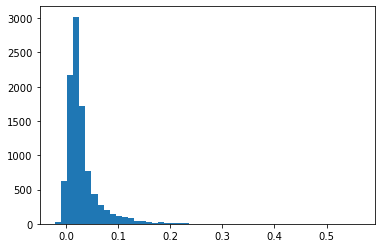

In [68]:
plt.hist(np_y_preds2, bins=50)

In [69]:
np_y_pred2_price = np_y_preds2 * y_norm_div + y_norm_sub
np_y_pred2_price

array([ 74630.72666,  97336.97484, 119387.11175, ...,  59035.52621,
       120766.01925,  30692.03852])

In [70]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [71]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
    }
)
df_result.head(10)

,GOLD,PRED
0,35800,74631.0
1,35800,97337.0
2,39600,119387.0
3,29800,77334.0
4,112900,179577.0
5,37400,111250.0
6,39500,40195.0
7,2350000,1087563.0
8,332000,261328.0
9,39900,127124.0


In [72]:
df_result.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139731.0
9891,79524,88871.0
9892,85000,170468.0
9893,134999,166740.0
9894,59000,59036.0
9895,110000,120766.0
9896,61500,30692.0


In [73]:
abs_err = np.abs(y_price - np_y_pred2_price)
abs_err

0       38830.726659
1       61536.974840
2       79787.111747
3       47533.793910
4       66677.318352
            ...     
9892    85468.449821
9893    31741.318014
9894       35.526206
9895    10766.019249
9896    30807.961481
Name: Price, Length: 9897, dtype: float64

In [74]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [75]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74631.0,108.47
1,35800,97337.0,171.89
2,39600,119387.0,201.48
3,29800,77334.0,159.51
4,112900,179577.0,59.06
5,37400,111250.0,197.46
6,39500,40195.0,1.76
7,2350000,1087563.0,53.72
8,332000,261328.0,21.29
9,39900,127124.0,218.61


In [76]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59587.0,5.42
9878,32900,37952.0,15.36
9879,53490,49445.0,7.56
9880,79000,65299.0,17.34
9881,79900,110933.0,38.84
9882,149000,103315.0,30.66
9883,143000,154443.0,8.00
9884,55000,72155.0,31.19
9885,62860,67189.0,6.89
9886,27500,4096.0,85.11


In [77]:
proc_err.mean()

40.56805033787927

In [78]:
# split the np_X_nb data into train observation and test observations
# train with NEQ
# present results

In [92]:
def train_neq(inputs, gold):
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall * 100))
    return overall

In [101]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [102]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [103]:
theta

array([-0.00947,  0.04491, -0.00012,  0.00013, -0.00004,  0.00216,
       -0.00224,  0.00098,  0.03066])

In [104]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
        GOLD      PRED  ERR%
0    84000.0  113258.0  0.35
1    39100.0   40597.0  0.04
2   310000.0  308372.0  0.01
3    69000.0   62423.0  0.10
4   182000.0   90802.0  0.50
5    80000.0  109550.0  0.37
6   324000.0  129163.0  0.60
7    96000.0  110449.0  0.15
8    46397.0   66101.0  0.42
9    62599.0   80234.0  0.28
10   44500.0   45313.0  0.02
11  105000.0   90076.0  0.14
12  100000.0   99261.0  0.01
13   95500.0   90629.0  0.05
14  115000.0   96014.0  0.17
15   73000.0  102938.0  0.41
16  120500.0  170923.0  0.42
17   50500.0    3477.0  0.93
18   84500.0   89494.0  0.06
19  125000.0  260128.0  1.08
          GOLD      PRED  ERR%
7897   74190.0  189218.0  1.55
7898   59350.0   69932.0  0.18
7899   59000.0   52586.0  0.11
7900   39650.0   23725.0  0.40
7901  235000.0  124617.0  0.47
7902  153000.0  153969.0  0.01
7903  259000.0  307154.0  0.19
7904  195000.0   10200.0  0.95
7905   97000.0  109493.0  0.13
7906   55000.0   48517.0  0.12
7907   98500.0  131081.0  0.33
7

0.4292320733101107

In [105]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)

Results for TEST
        GOLD      PRED  ERR%
0   214112.0  111095.0  0.48
1   179000.0  159556.0  0.11
2    70000.0   61118.0  0.13
3    45000.0   75787.0  0.68
4    97000.0  157630.0  0.63
5   115000.0   60240.0  0.48
6   295000.0  151500.0  0.49
7   109000.0  146947.0  0.35
8   149000.0  274797.0  0.84
9   114500.0  185296.0  0.62
10  102000.0  175794.0  0.72
11   81814.0   71271.0  0.13
12  289000.0  257674.0  0.11
13   72000.0   76019.0  0.06
14  166000.0  115333.0  0.31
15   54000.0   75537.0  0.40
16  225000.0  217845.0  0.03
17   31500.0     628.0  0.98
18  145000.0  246275.0  0.70
19   95000.0   65788.0  0.31
          GOLD      PRED  ERR%
1960   83500.0   86711.0  0.04
1961  176000.0  145396.0  0.17
1962   78500.0  127805.0  0.63
1963   60500.0   95763.0  0.58
1964  209000.0  209748.0  0.00
1965  100000.0   48269.0  0.52
1966  107000.0   52811.0  0.51
1967  133500.0  106409.0  0.20
1968   74900.0   94673.0  0.26
1969  119360.0   71686.0  0.40
1970   73000.0  158125.0  1.17
19

0.414322330844669

In [109]:
import torch as th

class SimpleLinerRealEstateModel(th.nn.Module):
    def __init__(self, n_feats, n_hid1=32):
        super().__init__()
        self.hidden1 = th.nn.Linear(n_feats, n_hid1)
        self.act1 = th.nn.ReLU()
        self.readout = th.nn.Linear(n_hid1, 1)
        return
    
    def forward(self, inputs):
        th_x = self.hidden1(inputs)
        th_x = self.act1(th_x)
        th_out = self.readout(th_x)
        return th_out


In [110]:
model = SimpleLinerRealEstateModel(8)
model

SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=8, out_features=32, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
# construct simple torch dataset
# for each individual batch within dataset
# apply gradient descent
# test the model (mayb validate before within training process)

# then do the same in tensorflow.keras